This is coding part of project pitch for CSE 572 Data Mining Course.
Trainig data has been taken taken from Kaggle and from below link.
https://www.kaggle.com/c/playground-series-s4e10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted")

In [4]:
# print(os.getcwd())
df = pd.read_csv("data/train.csv")


In [5]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo about dataset:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include="all"))



Shape of dataset: (58645, 13)

First 5 rows:
    id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_c

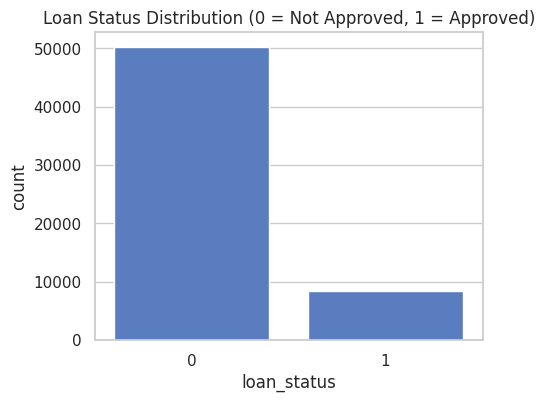

In [6]:
# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution (0 = Not Approved, 1 = Approved)")
plt.show()

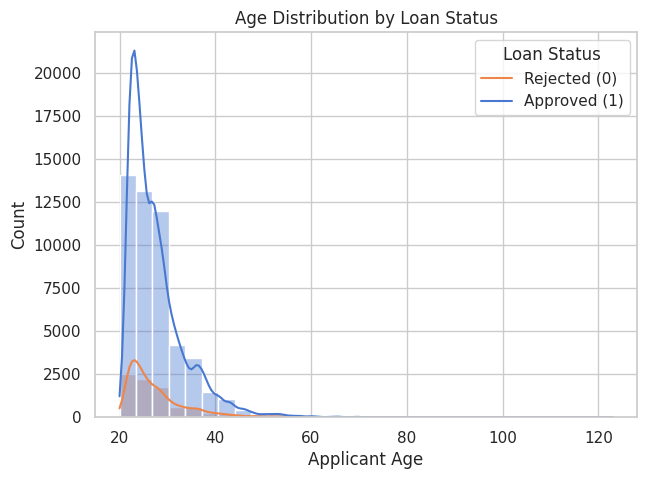

In [7]:
# Age distribution
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="person_age", hue="loan_status", bins=30, kde=True, alpha=0.4)
plt.title("Age Distribution by Loan Status")
plt.xlabel("Applicant Age")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.show()

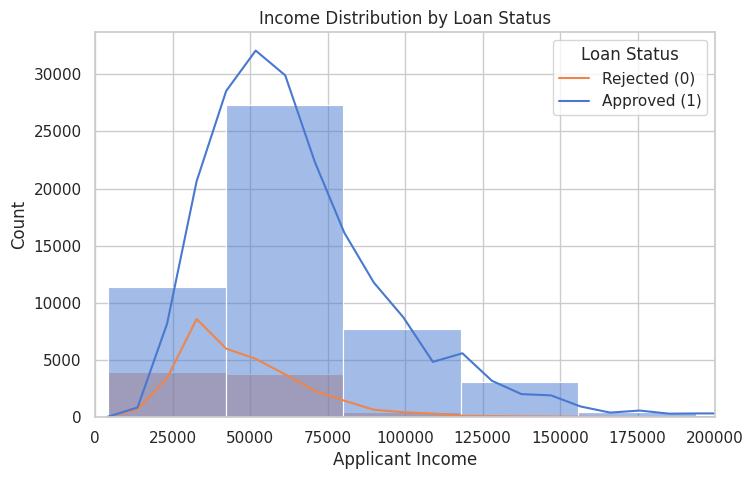

In [8]:
# Income distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="person_income", hue="loan_status", bins=50, kde=True, alpha=0.5)
plt.title("Income Distribution by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.xlim(0, 200000)  # focus on the main range, avoids extreme outliers
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.show()


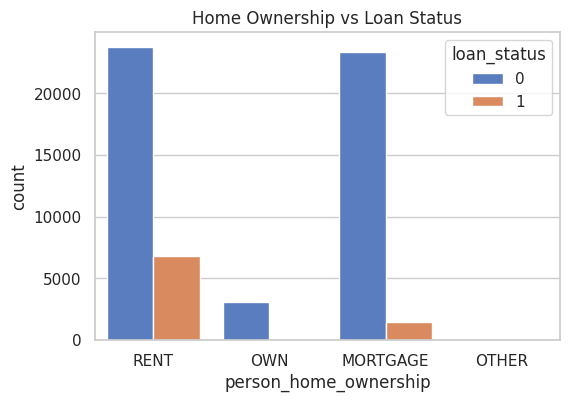

In [9]:
# Home ownership vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x="person_home_ownership", hue="loan_status", data=df)
plt.title("Home Ownership vs Loan Status")
plt.show()

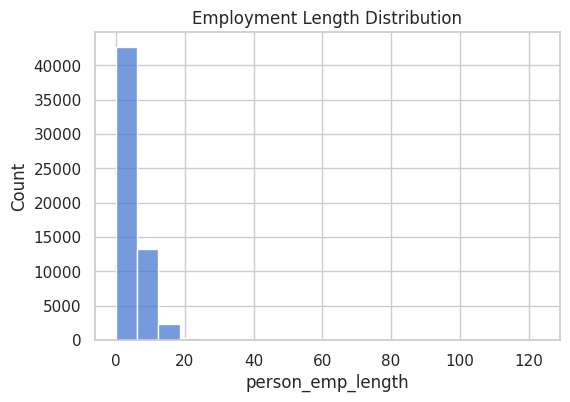

In [10]:
# Employment length distribution
plt.figure(figsize=(6,4))
sns.histplot(df["person_emp_length"], bins=20, kde=False)
plt.title("Employment Length Distribution")
plt.show()

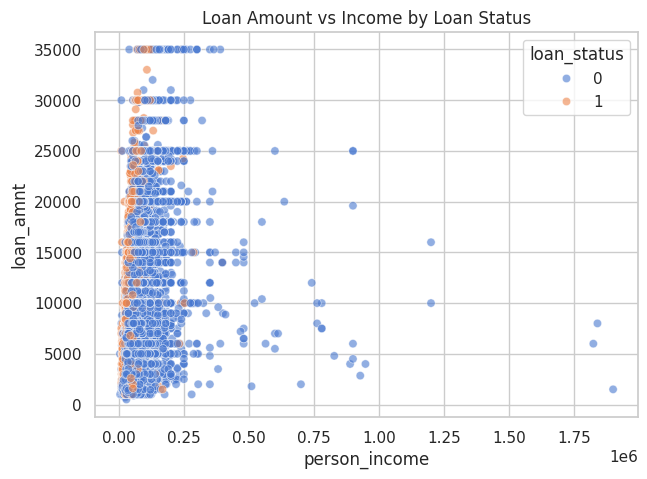

In [11]:
# Loan amount vs income (scatter)
plt.figure(figsize=(7,5))
sns.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", data=df, alpha=0.6)
plt.title("Loan Amount vs Income by Loan Status")
plt.show()

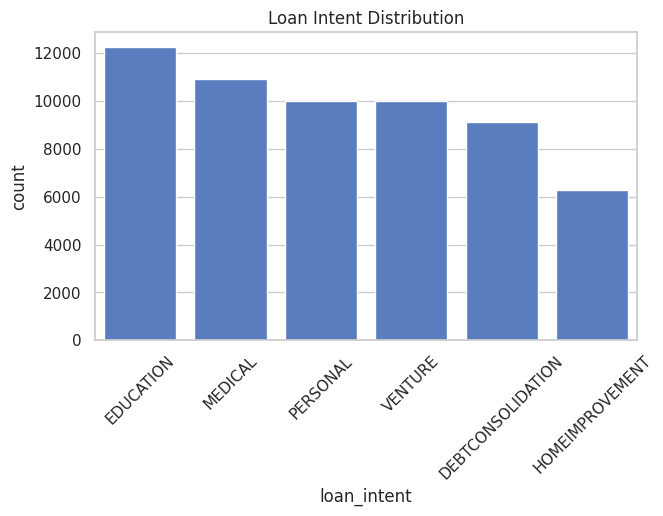

In [12]:
# Loan intent counts
plt.figure(figsize=(7,4))
sns.countplot(x="loan_intent", data=df, order=df["loan_intent"].value_counts().index)
plt.title("Loan Intent Distribution")
plt.xticks(rotation=45)
plt.show()

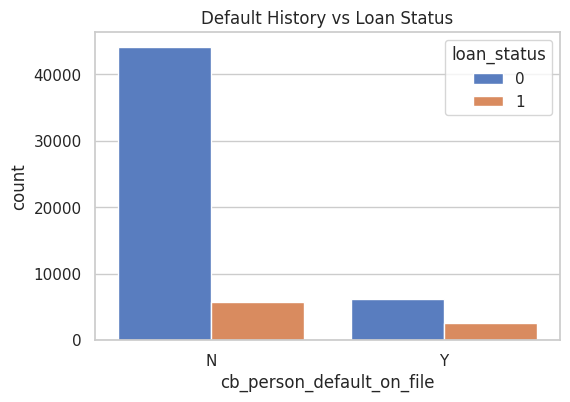

In [13]:
# Credit default history vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x="cb_person_default_on_file", hue="loan_status", data=df)
plt.title("Default History vs Loan Status")
plt.show()

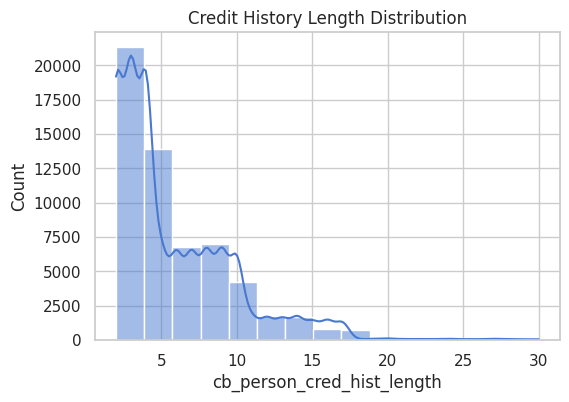

In [14]:
# Credit history length distribution
plt.figure(figsize=(6,4))
sns.histplot(df["cb_person_cred_hist_length"], bins=15, kde=True)
plt.title("Credit History Length Distribution")
plt.show()

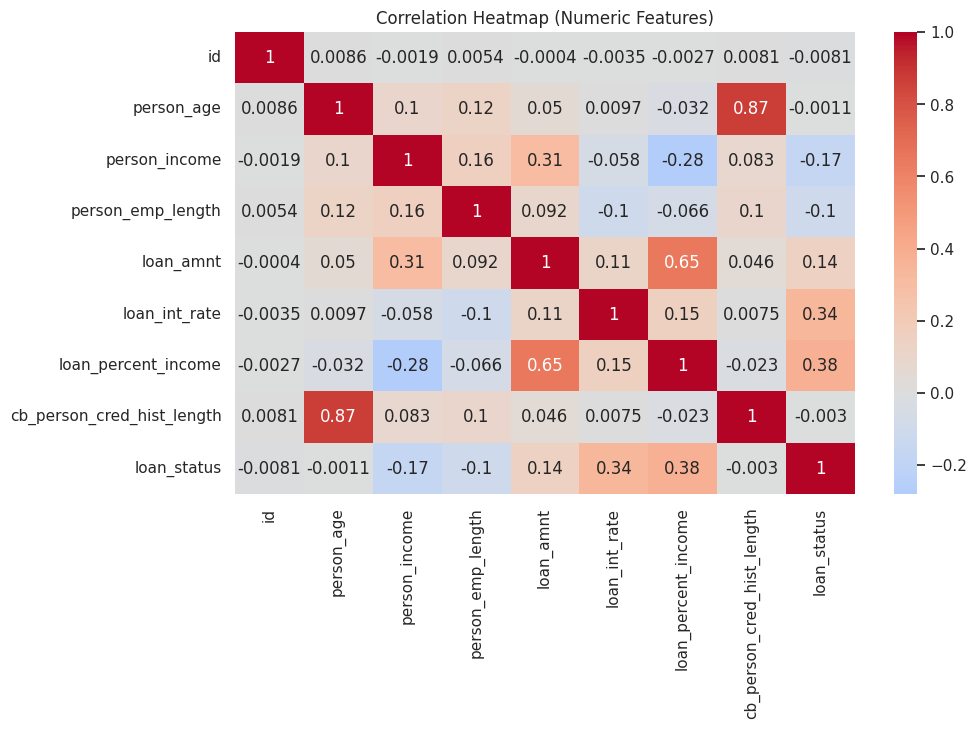

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


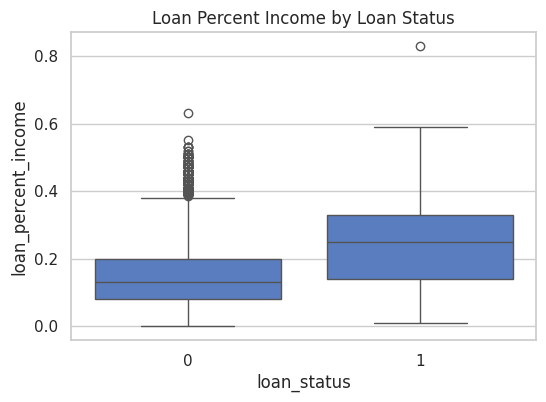

In [16]:
# Loan percent income by approval status
plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="loan_percent_income", data=df)
plt.title("Loan Percent Income by Loan Status")
plt.show()